## Introduction to Plotting

### Python Packages for plotting
- `matplotlib`: All plots in pandas are matplotlib objects
- `seaborn`: Focused on statistical visualization
- `bokeh`: To create interactive visualization for the internet
- `Plotly`: Create interactive and embedded visualization

### Matplotlib
Main submodule is `pyplot` which will give you different functions to work with 
different plot elements.

### Creating a Plot
- Import the necessary packages
- Import or create the data
- Call the appropriate plotting functions

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# Display the plots inside the notebook
%matplotlib inline

In [8]:
# Dummy data
x = [1, 2, 3, 4, 5]
y = [10, 20, 25, 30, 35]

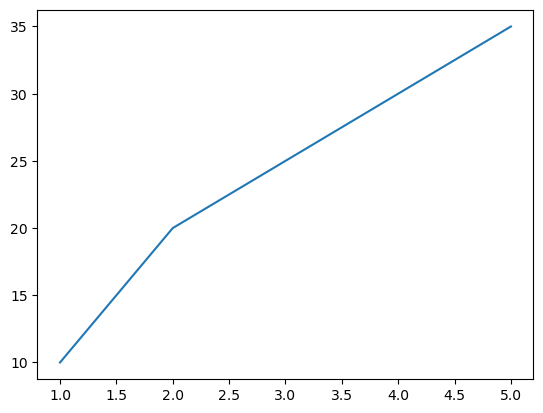

In [11]:
# Default is a line plot
plt.plot(x, y)

### Test data
Get the data from:
`icarus.cs.weber.edu/~hvalle/cs4580/data/plottingDemo01.zip`

In [13]:
# Load the data
hw_df = pd.read_csv('../data/hw.csv', index_col=[0])
hw_df.head()

,"Height(Inches)""","""Weight(Pounds)"""
Index,,
1,65.78,112.99
2,71.52,136.49
3,69.40,153.03
4,68.22,142.34
5,67.79,144.30


<Axes: xlabel='Index'>

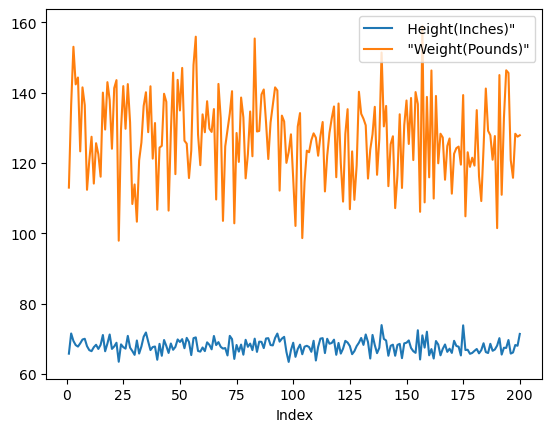

In [19]:
hw_df.plot()

## Common Plots
- Line
- Scatter
- Bar
- Histograms
- Area

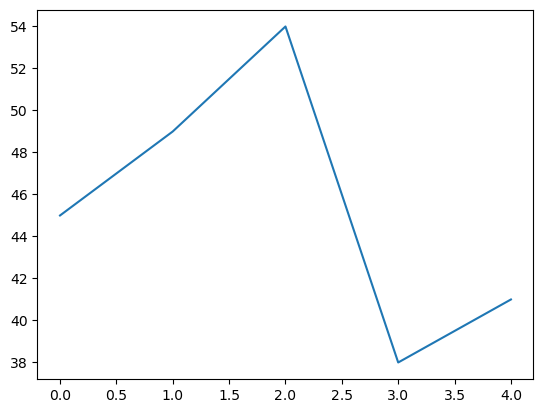

In [18]:
# Another line plot
y = [45, 49, 54, 38, 41]
plt.plot(y)